In [5]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("./final_project/final_project_dataset.pkl", "r"))

In [7]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test, name):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig(name)

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end
                                    


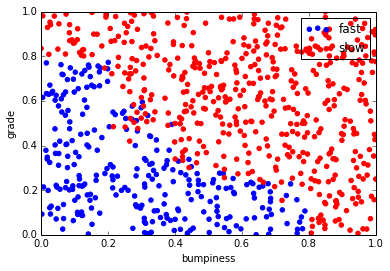

In [19]:
#!/usr/bin/python

import matplotlib.pyplot as plt
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture

#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
    #make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test





features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
#plt.show()
################################################################################


In [12]:
def Bayesclassifier(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!
    
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(features_train, labels_train)
    
    return clf

In [13]:

## your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

clf = Bayesclassifier(features_train, labels_train)
pred = clf.predict(features_test)







In [14]:
print clf.score(features_test, labels_test)

0.884


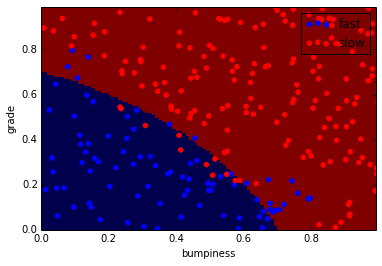

In [22]:
#prettyPicture(clf, features_test, labels_test, "aBayes.png")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

X_test = features_test
y_test = labels_test

x_min = 0.0; x_max = 1.0
y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")

In [47]:
def svmClassifier(features_train, labels_train, mykernel="linear" ):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!
    
    from time import time
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    #clf = svm.SVC(kernel = "rbf", max_iter = 10000000, C = 100000000)
    
    clf = svm.SVC(kernel = mykernel)
    t0 = time()
    clf.fit(features_train, labels_train)
    print "training time:", round(time()-t0, 3), "s" # train 2.55 s

    t1 = time()
    pred = clf.predict(features_test)
    print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s
    
    return clf

In [48]:
clf = svmClassifier(features_train, labels_train)
pred = clf.predict(features_test)

training time: 0.01 s
predict time: 0.001 s


In [49]:
print clf.score(features_test, labels_test)

0.92


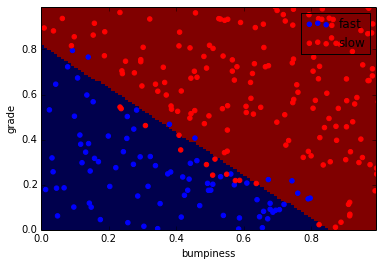

In [44]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

X_test = features_test
y_test = labels_test

x_min = 0.0; x_max = 1.0
y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")

In [13]:
#prettyPicture(clf, features_test, labels_test, "aSVM.png")

In [45]:
### if you try with rbf kernel ... ####

clf = svmClassifier(features_train, labels_train, "rbf")
pred = clf.predict(features_test)

training time: 0.01 s
predict time: 0.001 s


In [27]:
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s" # train 2.55 s

t1 = time()
pred = clf.predict(features_test)
print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s

print clf.score( features_test , labels_test ) 

IOError: [Errno 2] No such file or directory: '../tools/email_authors.pkl'